In [33]:
library(dplyr)
library(eeptools)
library(ggplot2)

In [4]:
data_df <- read.csv("../data/clean_refahdb.csv")

In [19]:
data_df %>% names

[1] "ID"                              "ParentID"                       
 [3] "BirthDate"                       "GenderId"                       
 [5] "postalcode"                      "Provincename"                   
 [7] "countyname"                      "isurban"                        
 [9] "AmCrdtr_95"                      "Amdbtr_95"                      
[11] "frstPrd_95"                      "lstPrd_95"                      
[13] "SmBnft_95"                       "AmCrdtr_96"                     
[15] "Amdbtr_96"                       "frstPrd_96"                     
[17] "lstPrd_96"                       "SmBnft_96"                      
[19] "AmCrdtr_97"                      "Amdbtr_97"                      
[21] "frstPrd_97"                      "lstPrd_97"                      
[23] "SmBnft_97"                       "AmCrdtr_98"                     
[25] "Amdbtr_98"                       "frstPrd_98"                     
[27] "lstPrd_98"                       "SmBnft_98"                      
[29] "Card98_Rials"                    "Card98_PaymentCount"            
[31] "Card99_Rials"                    "Card99PaymentCount"             
[33] "IsBiamrKhas"                     "IsMalool"                       
[35] "IsBimePardaz_Sandoghha"          "IsBazneshaste_Sandoghha"        
[37] "IsMaliati_Shaghel"               "daramad_Total_Rials"            
[39] "Cars_Count"                      "CarsPrice_Sum"                  
[41] "Trips_Count_AirNotPilgrimage"    "Trips_Count_NotAirNotPilgrimage"
[43] "Trips_Count_AirPilgrimage"       "Trips_Count_NotAirPilgrimage"   
[45] "HasMojavezSenfi"                 "Senf"                           
[47] "HasBimeSalamat"                  "BimeSalmat_Type"                
[49] "BirthDate_Jalali"

In [30]:
family_featurs <- data_df[c('ID', 'ParentID', 'GenderId', 'BirthDate', 'IsMalool', 'IsBiamrKhas')]
family_featurs$BirthDate <- family_featurs$BirthDate %>% as.Date
family_featurs %>% head

,ID,ParentID,GenderId,BirthDate,IsMalool,IsBiamrKhas
,<dbl>,<dbl>,<int>,<date>,<int>,<int>
1,385996899,391863876,2,1978-03-22,0,0
2,2633686968,2633686968,1,1995-02-05,0,0
3,312125928,1981002597,2,1970-05-13,0,0
4,70847160,70847160,1,1969-03-21,0,0
5,663191175,9230116821,2,2004-06-19,0,0
6,5795894952,94240284,2,1950-08-23,0,0


In [53]:
family_ids <- (family_featurs %>% group_by(ParentID) %>% summarise(
    age_anormal = sum(BirthDate > Sys.Date())
) %>% subset(age_anormal == 0))$ParentID

In [57]:
family_featurs <- family_featurs %>% subset(ParentID %in% family_ids)

In [59]:
family_featurs$Age <- age_calc(family_featurs$BirthDate, Sys.Date(), units = 'years')

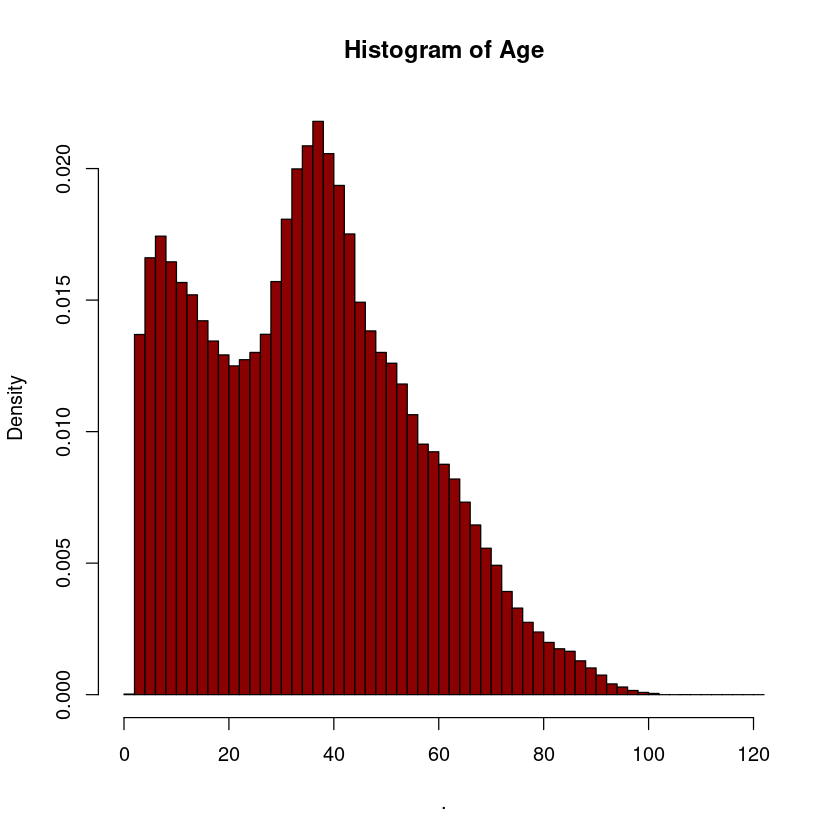

In [68]:
family_featurs$Age %>% hist(probability = TRUE, col = 'darkred', breaks = 50, main = 'Histogram of Age')

In [71]:
age.split <- function(x) {
    return( ifelse(x < 2, 0,
              ifelse(x < 6, 1, 
                    ifelse(x < 10, 2, 
                          ifelse(x < 15, 3, 
                                ifelse(x < 18, 4,
                                      ifelse(x < 22, 5, 
                                            ifelse(x < 30, 6,
                                                  ifelse(x < 45, 7,
                                                        ifelse(x < 60, 8,
                                                              ifelse(x < 85, 9, 10))))))))))
    )
}

In [84]:
family_featurs$AgeSplit <- age.split(family_featurs$Age) %>% as.factor

In [87]:
family_featurs$GenderId <- family_featurs$GenderId %>% as.factor
family_featurs$ParentID <- family_featurs$ParentID %>% as.factor

In [88]:
family_featurs %>% group_by(ParentID, GenderId, AgeSplit) %>% summarise(n())

`summarise()` has grouped output by 'ParentID', 'GenderId'. You can override using the `.groups` argument.



ParentID,GenderId,AgeSplit,n()
<fct>,<fct>,<fct>,<int>
22038,1,8,1
30402,1,8,1
31632,1,7,1
31632,1,9,1
31632,2,6,1
31632,2,9,1
80832,2,8,1
102603,1,8,1
102603,2,8,1


In [24]:
family_char_df <- family_featurs %>% group_by(ParentID) %>% summarise(
    size = n(),
    
    
)
family_char_df

ParentID,size
<dbl>,<int>
22038,1
30402,1
31632,4
80832,1
102603,2
112074,1
115518,5
115887,2
132984,3


[1] "1978-03-22" "1995-02-05" "1970-05-13" "1969-03-21" "2004-06-19"
    [6] "1950-08-23" "2002-09-21" "1994-02-07" "1967-02-12" "2009-04-03"
   [11] "1969-09-24" "1977-03-21" "2012-03-19" "1999-07-10" "2001-04-07"
   [16] "1998-08-08" "2019-12-09" "2006-11-18" "2014-11-20" "1985-06-18"
   [21] "1994-10-23" "1982-08-11" "1982-03-11" "1981-08-01" "2013-01-09"
   [26] "1982-12-22" "1953-03-11" "1967-08-11" "1976-01-21" "1977-09-11"
   [31] "2006-03-03" "2001-08-30" "1979-11-22" "1989-11-27" "1997-07-04"
   [36] "1967-06-22" "2017-08-26" "2007-08-12" "1988-06-02" "1955-09-25"
   [41] "1970-08-12" "1989-07-16" "1990-07-26" "1942-06-22" "2002-10-07"
   [46] "2012-03-27" "1959-09-11" "1957-11-17" "1961-08-30" "1993-12-31"
   [51] "1971-05-22" "1999-03-17" "2017-06-03" "1991-05-09" "1972-03-21"
   [56] "1969-06-23" "2016-01-02" "1993-06-22" "1990-02-20" "1979-04-28"
   [61] "1985-09-08" "2008-12-15" "1973-06-26" "1981-06-01" "2003-03-21"
   [66] "1952-03-21" "1980-12-11" "1986-09-03" "1956-10-23" "1973-09-01"
   [71] "1980-05-29" "2015-03-18" "2005-11-15" "1979-11-28" "1966-03-21"
   [76] "1977-09-09" "1983-09-21" "1977-08-28" "2004-03-27" "2008-02-02"
   [81] "2012-10-31" "1939-01-10" "1960-03-13" "2000-03-22" "1993-07-07"
   [86] "1985-03-21" "2011-11-20" "1933-12-06" "1999-02-13" "2007-03-22"
   [91] "2018-03-20" "2002-07-03" "1977-03-21" "1987-08-07" "1990-05-31"
   [96] "1997-06-11" "1997-10-16" "2000-03-10" "1995-09-23" "1983-09-19"
  [101] "1989-03-21" "1950-10-02" "1977-09-23" "2005-02-15" "1961-11-21"
  [106] "1982-06-24" "1990-09-19" "1952-04-04" "1960-02-29" "2005-08-19"
  [111] "1979-03-21" "1978-12-22" "2013-08-14" "1972-02-20" "2001-09-08"
  [116] "1969-06-28" "1989-07-06" "2009-05-11" "1979-09-01" "2012-08-23"
  [121] "2016-04-07" "1956-11-06" "1973-03-26" "1990-11-01" "1981-09-19"
  [126] "1984-04-09" "1982-03-21" "1969-08-23" "1980-11-06" "1966-10-26"
  [131] "1998-02-27" "1946-07-11" "1947-04-29" "1992-04-02" "1960-05-26"
  [136] "2012-04-11" "2001-12-03" "2000-03-28" "1967-05-20" "1959-03-22"
  [141] "1991-10-16" "1952-03-30" "2009-06-17" "2004-12-27" "1983-04-30"
  [146] "1981-08-03" "2017-07-23" "2015-09-15" "1981-01-25" "1979-09-19"
  [151] "1974-05-17" "2006-10-08" "1979-08-30" "1998-11-16" "1993-01-07"
  [156] "2014-05-26" "2015-09-08" "2015-04-14" "1985-09-16" "1990-09-16"
  [161] "1990-04-10" "2005-09-12" "1981-06-11" "1976-08-21" "1965-04-27"
  [166] "1972-03-24" "2015-04-25" "2016-06-22" "1985-04-17" "1988-02-06"
  [171] "1960-02-03" "2014-08-31" "2018-04-06" "2007-06-03" "1985-07-23"
  [176] "2007-04-21" "2017-07-03" "1993-07-12" "1969-12-11" "1954-04-19"
  [181] "2015-05-16" "1986-12-29" "1975-03-21" "2011-05-24" "2014-01-07"
  [186] "1999-10-17" "2008-05-07" "2000-11-23" "1996-05-01" "2007-04-12"
  [191] "1960-06-28" "1955-09-24" "1981-02-20" "1988-06-28" "2013-06-17"
  [196] "1992-08-09" "1983-09-21" "2011-04-28" "2001-04-06" "1945-05-26"
  [201] "1972-06-18" "1985-03-25" "1975-07-11" "1985-04-21" "1985-04-21"
  [206] "2011-07-23" "1951-08-01" "1989-04-09" "1992-11-25" "2016-08-23"
  [211] "1997-01-29" "2008-11-01" "2009-04-13" "1969-08-06" "2008-10-19"
  [216] "1999-05-30" "2014-03-26" "2006-01-26" "1985-06-12" "2004-09-06"
  [221] "1976-08-30" "1963-03-27" "1991-11-22" "2006-09-06" "1988-02-09"
  [226] "2018-10-29" "1990-09-03" "1960-05-22" "2004-11-17" "1990-05-23"
  [231] "1971-11-01" "1994-02-23" "2002-11-16" "1966-12-06" "1977-04-29"
  [236] "2006-03-26" "2015-05-09" "1985-08-01" "1962-04-09" "1966-11-05"
  [241] "2005-04-28" "2016-06-11" "1983-08-11" "1984-03-03" "1998-06-07"
  [246] "1925-09-24" "1987-02-23" "1984-09-21" "1988-06-14" "2019-03-30"
  [251] "1981-08-05" "1970-08-01" "2011-10-30" "1977-09-05" "1995-11-21"
  [256] "1959-04-22" "1997-09-14" "1968-08-28" "1974-08-24" "2012-11-02"
  [261] "1939-12-23" "1986-09-21" "1989-09-21" "1983-03-13" "1985-05-09"
  [266] "2016-06-16" "1969-10-06" "1984-04-27" "1982-11-29" "1983-04-21"
  [271] "1980-01-10" "2011-03-10" "2001-10-23" "1963-12-28" "1